In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
import sklearn
from sklearn import metrics
%matplotlib inline

In [2]:
dataset=pd.read_csv('Featured_dataset.csv')
dataset.head()

,url,url_len,count_comma,count_semicolon,count_quotes,count_braces,count_redirects,count_pipes,count_dots,count_dash,...,count_dots_host,count_digit_host,count_non_alphanumeric_host,parameter_count,parameter_length,directory_len,digit_char_ratio,vowel_consonant_ratio,avg_len_token,label
0,https://2bittechnology.in/js/mfilealldom/mfile...,72,0,0,0,0,0,0,1,0,...,1,1,1,0,0,55,2.3,0.241379,9.4,1
1,https://www.xporn.eventfreex.com/,25,0,0,0,0,0,0,3,0,...,3,1,3,0,0,1,21.0,0.315789,5.4,1
2,https://upapage.000webhostapp.com/set.html,34,0,0,0,0,0,0,3,0,...,2,3,2,0,0,9,9.0,0.360000,6.4,1
3,https://upapage.000webhostapp.com/sets.html?=1...,115,0,0,0,0,0,0,3,0,...,2,3,2,4,80,10,5.8,0.321839,14.5,1
4,https://f.samsung-lucky-winner.xyz/,27,0,0,0,0,0,0,2,2,...,2,1,4,0,0,1,22.0,0.227273,5.8,1


In [3]:
dataset.columns

Index(['url', 'url_len', 'count_comma', 'count_semicolon', 'count_quotes',
       'count_braces', 'count_redirects', 'count_pipes', 'count_dots',
       'count_dash', 'count_underline', 'count_question', 'count_equal',
       'count_attherate', 'count_char', 'count_digit', 'count_alphanumeric',
       'count_non_alphanumeric', 'count_tlds', 'host_has_ip', 'present_ip',
       'present_http', 'count_dots_host', 'count_digit_host',
       'count_non_alphanumeric_host', 'parameter_count', 'parameter_length',
       'directory_len', 'digit_char_ratio', 'vowel_consonant_ratio',
       'avg_len_token', 'label'],
      dtype='object')

In [12]:
dataset.shape

(1034546, 32)

In [13]:
dataset.describe()

,url_len,count_comma,count_semicolon,count_quotes,count_braces,count_redirects,count_pipes,count_dots,count_dash,count_underline,...,count_dots_host,count_digit_host,count_non_alphanumeric_host,parameter_count,parameter_length,directory_len,digit_char_ratio,vowel_consonant_ratio,avg_len_token,label
count,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,...,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06,1.034546e+06
mean,5.369174e+01,2.025043e-02,7.194460e-02,1.470017e-02,2.148769e-02,7.341385e-03,1.669331e-03,2.282747e+00,1.253287e+00,4.047573e-01,...,1.729736e+00,1.339764e+00,1.849844e+00,2.606583e-01,7.635396e+00,2.812821e+01,2.235677e+01,3.738621e-01,8.365934e+00,2.930010e-01
std,4.491613e+01,3.110086e-01,7.249470e-01,2.055408e-01,2.570595e-01,1.273233e-01,1.192188e-01,1.452444e+00,2.568526e+00,1.306302e+00,...,9.559944e-01,2.722929e+00,1.144172e+00,8.610489e-01,3.499507e+01,2.553054e+01,1.889225e+01,1.236255e-01,5.323125e+00,4.551391e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.444444e-01,0.000000e+00
25%,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,6.750000e+00,2.937500e-01,5.555556e+00,0.000000e+00
50%,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,1.900000e+01,3.684211e-01,7.222222e+00,0.000000e+00
75%,6.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,...,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01,3.300000e+01,4.500000e-01,9.555556e+00,1.000000e+00
max,4.010000e+03,3.600000e+01,1.040000e+02,2.600000e+01,2.200000e+01,1.600000e+01,3.700000e+01,7.400000e+01,5.000000e+01,2.000000e+02,...,3.400000e+01,1.340000e+02,3.400000e+01,4.300000e+01,3.975000e+03,2.156000e+03,2.141000e+03,2.000000e+00,4.475556e+02,1.000000e+00


In [9]:
dataset=sklearn.utils.shuffle(dataset)

In [10]:
X=dataset.drop(['url','label'],axis=1)
y=dataset.label

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc_x=MinMaxScaler()
X_scaled=sc_x.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.02, random_state=0)

In [22]:
len(y_train[y_train==1])/len(y_train)*100

29.296003866430603

In [23]:
len(y_test[y_test==1])/len(y_test)*100

29.500749117974003

# Logistic regression

### newton-cg

In [24]:
logistic_regrassor1=LogisticRegression(solver='newton-cg')
logistic_regrassor1.fit(X_train,y_train)
pred=logistic_regrassor1.predict(X_test)
metrics.confusion_matrix(y_test, pred)

array([[13986,   601],
       [ 3559,  2545]], dtype=int64)

In [25]:
logistic_regrassor1.score(X_test,y_test)*100
pred=logistic_regrassor1.predict(X_test)


In [26]:
print(sklearn.metrics.classification_report(y_test,pred) )

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     14587
           1       0.81      0.42      0.55      6104

    accuracy                           0.80     20691
   macro avg       0.80      0.69      0.71     20691
weighted avg       0.80      0.80      0.78     20691



In [27]:
import joblib
file='lr.pkl'
joblib.dump(logistic_regrassor1,file)

['lr.pkl']

### lbfgs

In [28]:
logistic_regrassor2=LogisticRegression(solver='lbfgs',max_iter=500)
logistic_regrassor2.fit(X_train,y_train)
pred=logistic_regrassor2.predict(X_test)
metrics.confusion_matrix(y_test, pred)

array([[13987,   600],
       [ 3557,  2547]], dtype=int64)

In [29]:
logistic_regrassor2.score(X_test,y_test)*100
pred=logistic_regrassor2.predict(X_test)
print("Precision = {}".format(precision_score(y_test,pred, average='macro')))
print("Recall = {}".format(recall_score(y_test,pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test,pred)))
print("F1 score = {}".format(f1_score(y_test,pred,average='macro')))

Precision = 0.8032974263374625
Recall = 0.6880674252042767
Accuracy = 0.7990913923928278
F1 score = 0.710633279613248


In [30]:
print(sklearn.metrics.classification_report(y_test,pred) )

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     14587
           1       0.81      0.42      0.55      6104

    accuracy                           0.80     20691
   macro avg       0.80      0.69      0.71     20691
weighted avg       0.80      0.80      0.78     20691



# Random forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
pred=model.predict(X_test)
metrics.confusion_matrix(y_test, pred)

array([[13849,   738],
       [ 1121,  4983]], dtype=int64)

In [33]:
model.score(X_test,y_test)*100
pred=model.predict(X_test)
print("Precision = {}".format(precision_score(y_test,pred, average='macro')))
print("Recall = {}".format(recall_score(y_test,pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test,pred)))
print("F1 score = {}".format(f1_score(y_test,pred,average='macro')))

Precision = 0.8980592368095743
Recall = 0.882878470353816
Accuracy = 0.910154173312068
F1 score = 0.8899476376351252


In [34]:
print(sklearn.metrics.classification_report(y_test,pred) )

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14587
           1       0.87      0.82      0.84      6104

    accuracy                           0.91     20691
   macro avg       0.90      0.88      0.89     20691
weighted avg       0.91      0.91      0.91     20691



In [35]:
file='random_froest.pkl'
joblib.dump(model,file)

['random_froest.pkl']

# Knn

In [7]:
import joblib
file='knn.pkl'
k_model=joblib.load(file)

In [ ]:
pred = k_model.predict(X_test)
print("Precision = {}".format(precision_score(y_test,pred, average='macro')))
print("Recall = {}".format(recall_score(y_test,pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test,pred)))
print("F1 score = {}".format(f1_score(y_test,pred,average='macro')))

In [ ]:
metrics.confusion_matrix(y_test, pred)

In [ ]:
print(sklearn.metrics.classification_report(y_test,pred) )

# Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)

In [27]:
clf.score(X_test,y_test)*100

88.96185272444734

In [16]:
pred=clf.predict(X_test)
print("Precision = {}".format(precision_score(y_test,pred, average='macro')))
print("Recall = {}".format(recall_score(y_test,pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test,pred)))
print("F1 score = {}".format(f1_score(y_test,pred,average='macro')))

Precision = 0.8632600714544949
Recall = 0.8671110398472734
Accuracy = 0.8871490019815379
F1 score = 0.8651445670870462


In [29]:
metrics.confusion_matrix(y_test, pred)

array([[13679,  1050],
       [ 1152,  4068]], dtype=int64)

In [ ]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf=clf.fit(X_train,y_train)

In [ ]:
pred=clf.predict(X_test)
print("Precision = {}".format(precision_score(y_test,pred, average='macro')))
print("Recall = {}".format(recall_score(y_test,pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test,pred)))
print("F1 score = {}".format(f1_score(y_test,pred,average='macro')))
metrics.confusion_matrix(y_test, pred)

In [17]:
print(sklearn.metrics.classification_report(y_test,pred) )

              precision    recall  f1-score   support

          -1       0.80      0.82      0.81      6110
           1       0.92      0.92      0.92     14581

    accuracy                           0.89     20691
   macro avg       0.86      0.87      0.87     20691
weighted avg       0.89      0.89      0.89     20691



In [55]:
import matplotlib.pyplot as plt


In [56]:


langs = ['Logistic Regression', 'Random Forest', 'Desicion Tree', 'Knn']
Accurecy = [80,91,88,88]


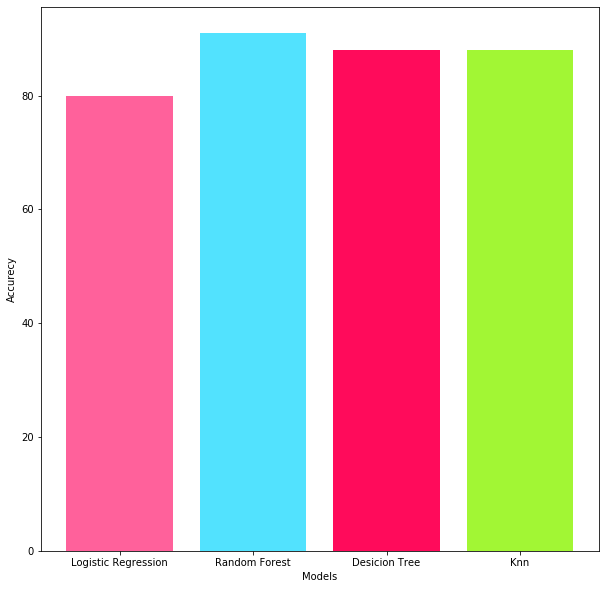

In [69]:
plt.figure(figsize=(10,10))
plt.bar(langs,Accurecy, color=['#ff619b', '#52e2fe', '#ff0b5b', '#a2f634'])
plt.xlabel("Models")
plt.ylabel("Accurecy")
plt.savefig('fig.png')

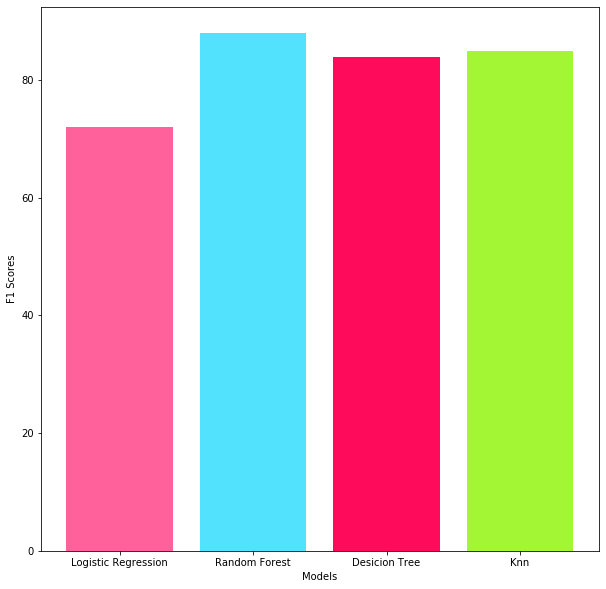

In [71]:
f1=[72,88,84,85]
plt.figure(figsize=(10,10))
plt.bar(langs,f1, color=['#ff619b', '#52e2fe', '#ff0b5b', '#a2f634'])
plt.xlabel("Models")
plt.ylabel("F1 Scores")
plt.savefig('fig1.png')